### Financial Inclusion remains one amongst the most obstacles to economic and human development in Africa. 
Having a banking account has been thought to be one amongst the financial inclusion in Africa in this project we are going to measure and predict that people are possibly to possess or use a banking account. 

Our solution are going to be facilitate offer a sign of the state of monetary inclusion in east Africa nations, Rwanda, Tanzania, and Uganda, whereas providing insights into a number of the key demographic factors that may drive individuals’ to financial gain.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing files

train = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion Train_v2.csv')
test = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion Test_v2.csv')
var_def = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion VariableDefinitions.csv')

train_test_data = [train, test]

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
train.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [6]:
train.shape

(23524, 13)

In [7]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [10]:
train.keys()

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [11]:
train['bank_account'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [13]:
train['year'].unique()

array([2018, 2016, 2017], dtype=int64)

In [14]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [15]:
train['household_size'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20, 21], dtype=int64)

In [16]:
train['age_of_respondent'].sort_values().unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [17]:
train['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [18]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [19]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [20]:
test.shape

(10086, 12)

In [21]:
test.keys()

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [22]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [23]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [24]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

# Visualisation

## Bar Chart for Categorical Feature

- Country
- Year
- Location type
- Cell phone access
- Gender
- Relationship with head
- Marital Status
- Education level
- Job type

In [25]:
#train['bank_account'].value_counts()

In [26]:
train[['country', 'bank_account']].groupby(['country'], as_index = False).sum().sort_values(by= 'bank_account', ascending = False)

,country,bank_account
0,Kenya,YesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoN...
1,Rwanda,NoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNo...
2,Tanzania,NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...
3,Uganda,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYe...


In [27]:
def barplot(features):
    has_account = train[train['bank_account']=='Yes'][features].value_counts()
    
    no_account  = train[train['bank_account']== 'No'][features].value_counts()
    
    df = pd.DataFrame([has_account, no_account])
    df.index = ['has_account', 'no_account']
    
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [28]:
country_mapping = {'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3}

for dataset in train_test_data:
    dataset['country'] = dataset['country'].map(country_mapping)

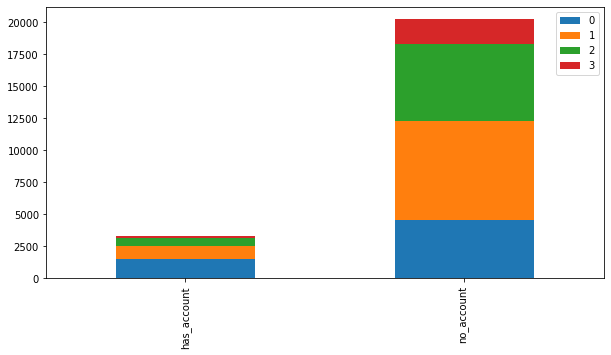

In [29]:
barplot('country')

==> Respondents from <b>Rwanda</b> are most likely not to have a bank account

In [30]:
#train['country'].plot.bar()

In [31]:
#train.dtypes

In [32]:
train[['year', 'bank_account']].groupby(['year'], as_index = False).sum().sort_values(by= 'bank_account', ascending = False)

,year,bank_account
2,2018,YesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoN...
0,2016,NoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNo...
1,2017,NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...


In [33]:
year_mapping = {2016:0, 2017:1, 2018:2}

for dataset in train_test_data:
    dataset['year']= dataset['year'].map(year_mapping)

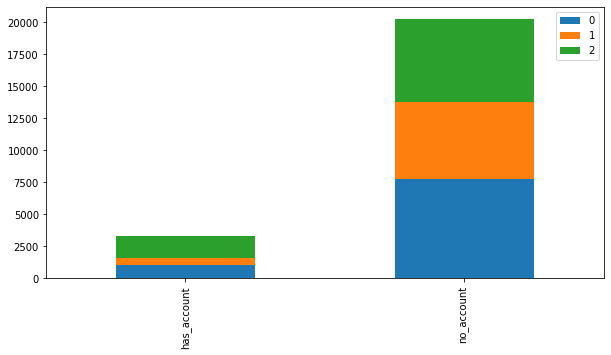

In [34]:
barplot('year')

In [35]:
location_mapping = {'Rural': 0, 'Urban':1}

for dataset in train_test_data:
    dataset['location_type'] = dataset['location_type'].map(location_mapping)

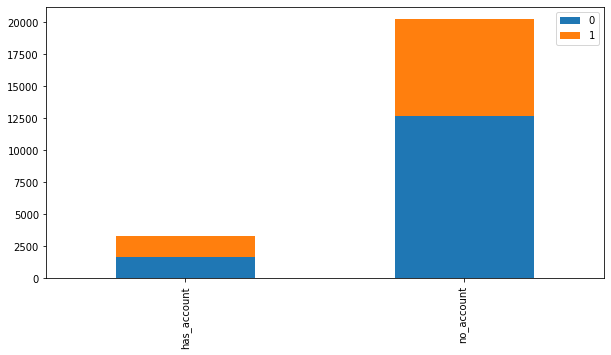

In [36]:
barplot('location_type')

==> Those from the <b>rural area</b> are mostly likely bor to have a bank account

In [37]:
train.dtypes

country                    int64
year                       int64
uniqueid                  object
bank_account              object
location_type              int64
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [38]:
cellphone_mapping = {'Yes':0, 'No':1}
for dataset in train_test_data:
    dataset['cellphone_access'] = dataset['cellphone_access'].map(cellphone_mapping)

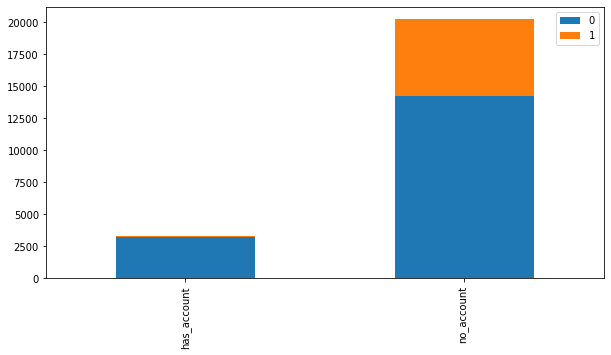

In [39]:
barplot('cellphone_access')

In [40]:
gender_mapping = {'Male':0, 'Female':1}

for dataset in train_test_data:
    dataset['gender_of_respondent']= dataset['gender_of_respondent'].map(gender_mapping)

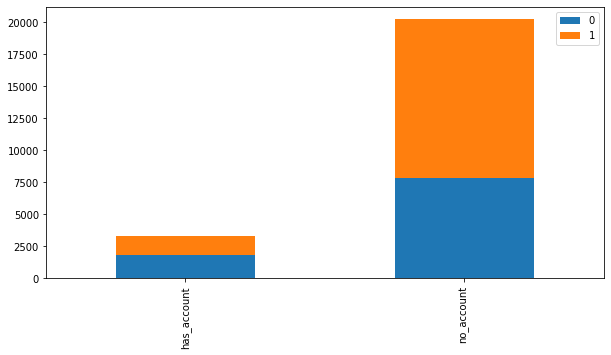

In [41]:
barplot('gender_of_respondent')

In [42]:
rwh_mapping = {'Head of Household': 0, 'Spouse': 1, 'Child':2, 'Other relative':3, 'Parent':3, 'Other non-relatives':4}

for dataset in train_test_data:
    dataset['relationship_with_head'] = dataset['relationship_with_head'].map(rwh_mapping)

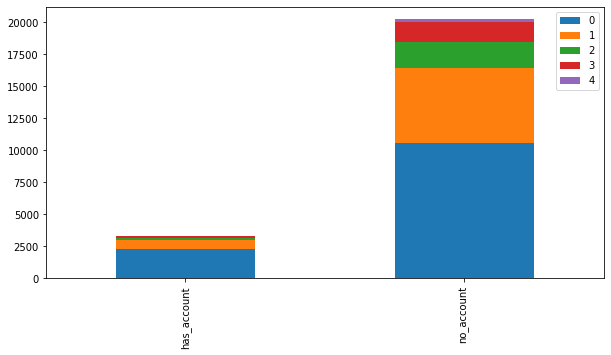

In [43]:
barplot('relationship_with_head')

In [44]:
marital_status_mapping = {'Married/Living together':0, 'Single/Never Married':1, 'Widowed':2, 'Divorced/Seperated':3, 'Dont know':4}

for dataset in train_test_data:
    dataset['marital_status'] = dataset['marital_status'].map(marital_status_mapping)

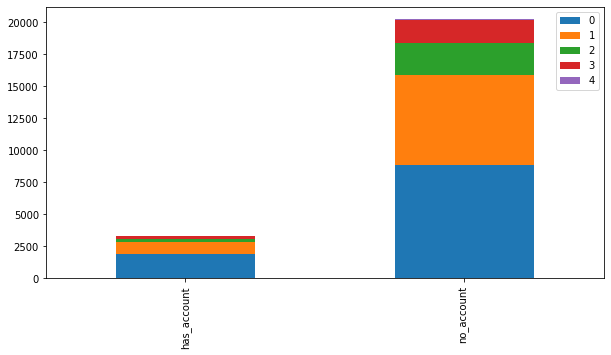

In [45]:
barplot('marital_status')

In [46]:
education_mapping = {'Primary education': 0, 'Secondary education': 1, 'Tertiary education':2, 'Vocational/Specialised training':3, 'No formal education':4, 'Other/Dont know/RTA':4}

for dataset in train_test_data:
    dataset['education_level']= dataset['education_level'].map(education_mapping)

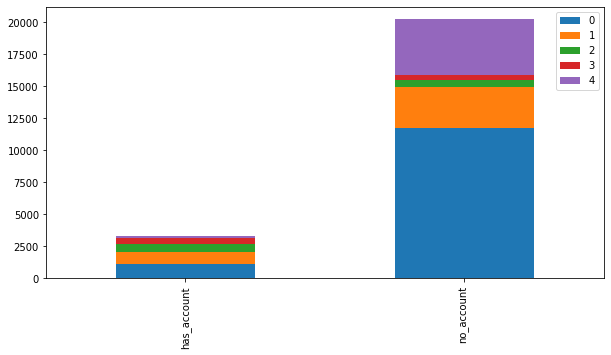

In [47]:
barplot('education_level')

In [48]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [49]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [50]:
job_mapping = {'Self employed':0, 'Farming and Fishing': 1, 'Formally employed Private': 2, 'Formally employed Government':2, 'Informally employed':3, 'Other Income':3, 'Remittance Dependent':4, 'Government Dependent':4, 'No Income':5, 'Dont Know/Refuse to answer':5}

for dataset in train_test_data:
    dataset['job_type']= dataset['job_type'].map(job_mapping)

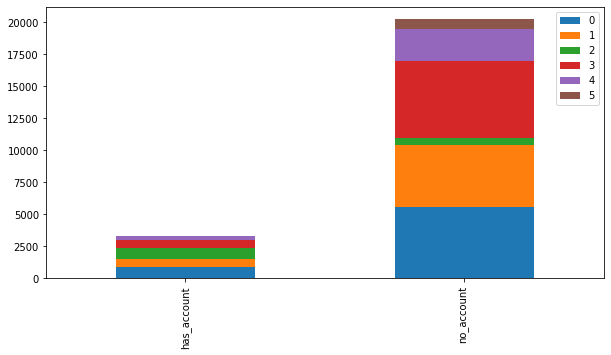

In [51]:
barplot('job_type')

In [52]:
train['job_type'].value_counts()

3    6677
0    6437
1    5441
4    2774
2    1442
5     753
Name: job_type, dtype: int64

In [53]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Numerical Variables

- Age
- Household size

In [54]:
train.keys()

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

<function matplotlib.pyplot.xlim(*args, **kwargs)>

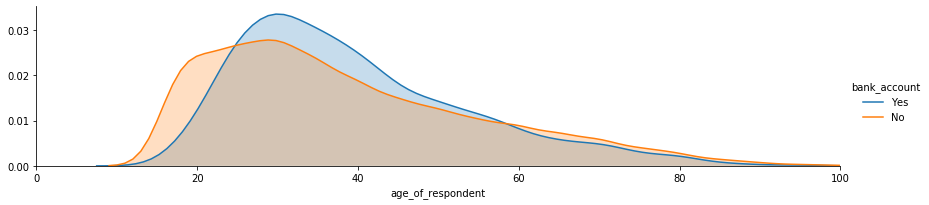

In [55]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'age_of_respondent', shade = True)
facet.set(xlim=(0,train['age_of_respondent'].max()))
facet.add_legend()
plt.xlim

In [56]:
train['age_of_respondent'].value_counts()

30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: age_of_respondent, Length: 85, dtype: int64

<Figure size 864x720 with 0 Axes>

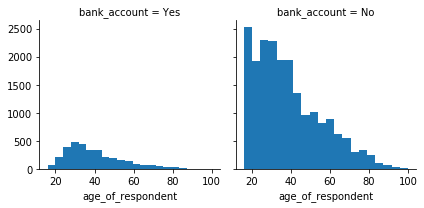

In [57]:
plt.figure(figsize = (12,10))
g = sns.FacetGrid(train, col = 'bank_account')
g.map(plt.hist, 'age_of_respondent', bins =20)

In [58]:
for dataset in train_test_data:
    dataset.loc[(dataset['age_of_respondent'] >=16) & (dataset['age_of_respondent'] <= 24), 'age_of_respondent'] = 0.2,
    dataset.loc[(dataset['age_of_respondent'] >24) & (dataset['age_of_respondent'] <= 34), 'age_of_respondent'] = 0.4,
    dataset.loc[(dataset['age_of_respondent'] >34) & (dataset['age_of_respondent'] <= 40), 'age_of_respondent'] = 0.6,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 46), 'age_of_respondent'] = 0.8,
    dataset.loc[(dataset['age_of_respondent'] >46) & (dataset['age_of_respondent'] <= 54), 'age_of_respondent'] = 1.0,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 66), 'age_of_respondent'] = 1.2,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 74), 'age_of_respondent'] = 1.4,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 80), 'age_of_respondent'] = 1.6,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 86), 'age_of_respondent'] = 1.8,
    dataset.loc[(dataset['age_of_respondent'] >86), 'age_of_respondent'] = 2.0,

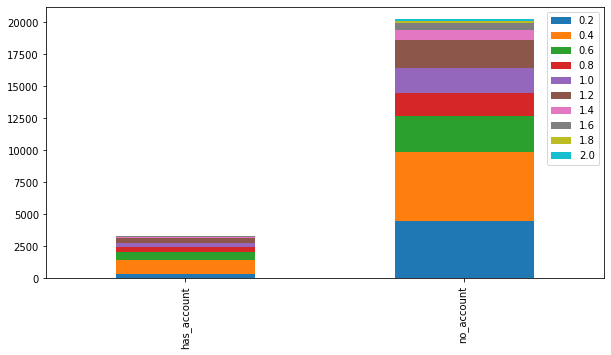

In [59]:
barplot('age_of_respondent')

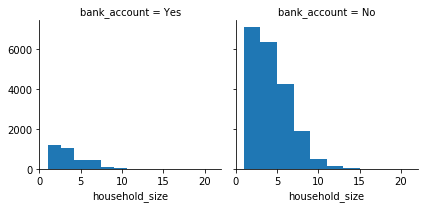

In [60]:
g = sns.FacetGrid(train, col = 'bank_account')
g.map(plt.hist, 'household_size')

In [61]:
train['household_size'].value_counts().sort_values()

21       1
17       1
18       1
20       1
16       4
14      10
15      11
13      25
12      68
11      69
10     190
9      363
8      751
7     1400
6     2096
5     2853
1     3057
4     3474
3     3920
2     5229
Name: household_size, dtype: int64

In [62]:
train['household_size'].min()

1

<function matplotlib.pyplot.xlim(*args, **kwargs)>

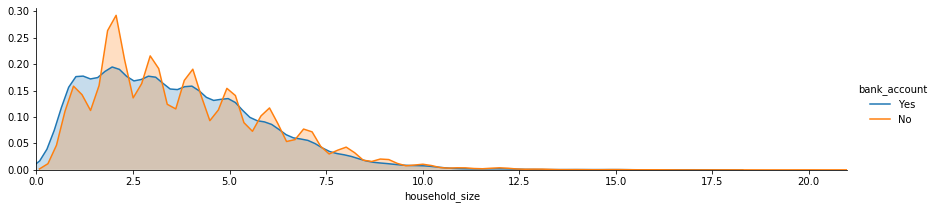

In [63]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'household_size', shade = True)
facet.set(xlim=(0,train['household_size'].max()))
facet.add_legend()
plt.xlim

(12, 21)

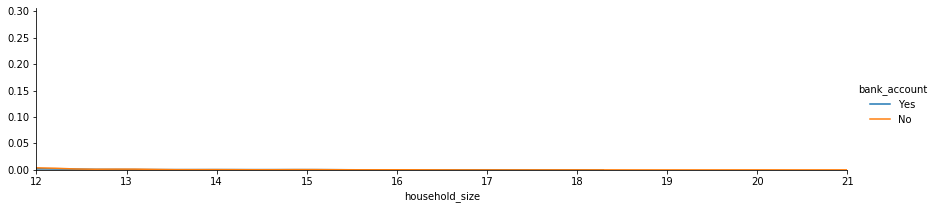

In [64]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'household_size', shade = True)
facet.set(xlim=(0,train['household_size'].max()))
facet.add_legend()
plt.xlim(12, 21)

In [65]:
house_mapping = {1: 0, 2:0.2, 3:0.4, 4:0.6,  5:0.8, 6:1.0, 7:1.2, 8:1.4, 9:1.6, 10:1.8, 11:2.0,12:2.0, 13:2.0, 14:2.0, 15:2.0, 16:2.0, 17:2.0, 18:2.0, 19:2.0, 20:2.0, 21:2.0}

for dataset in train_test_data:
    dataset['household_size'] = dataset['household_size'].map(house_mapping)

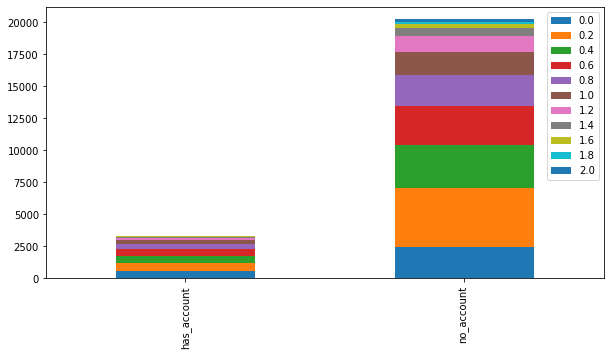

In [66]:
barplot('household_size')

In [67]:
train['household_size'].value_counts().sort_values()

1.8     190
2.0     191
1.6     363
1.4     751
1.2    1400
1.0    2096
0.8    2853
0.0    3057
0.6    3474
0.4    3920
0.2    5229
Name: household_size, dtype: int64

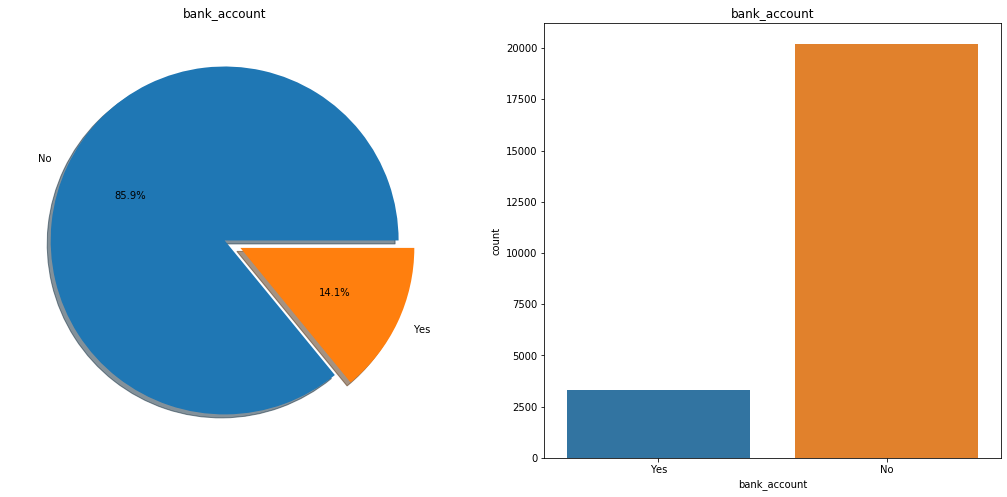

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['bank_account'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('bank_account')
ax[0].set_ylabel('')
sns.countplot('bank_account',data=train,ax=ax[1])
ax[1].set_title('bank_account')
plt.show()

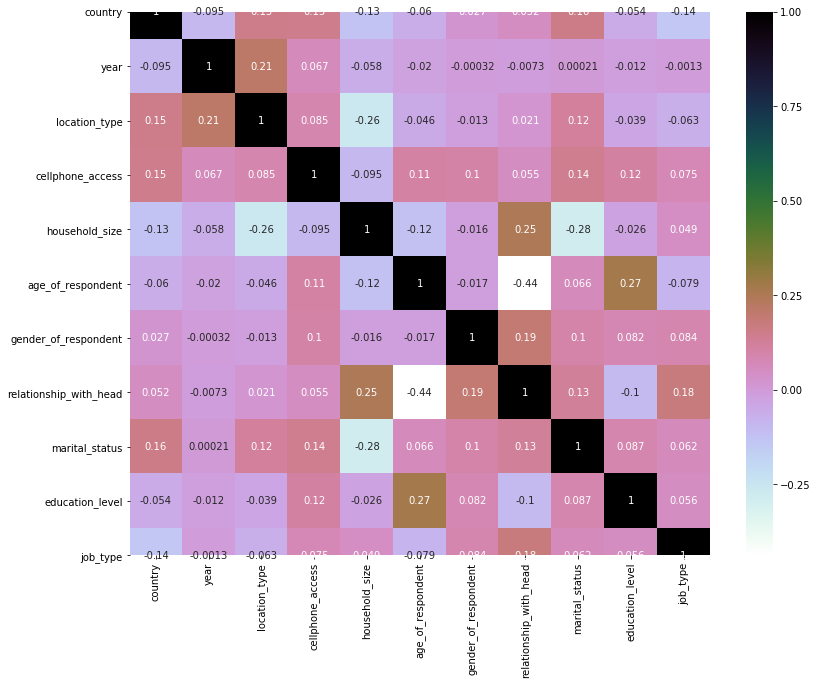

In [69]:
plt.figure(figsize=(13,10)) 
sns.heatmap(train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted
plt.show();

In [75]:
pd.crosstab(train.cellphone_access,train.bank_account,margins=True).style.background_gradient(cmap='summer_r')

# 0 no cell phone
# 1 has cell phone

bank_account,No,Yes,All
cellphone_access,,,
0,14246,3208,17454
1,5966,104,6070
All,20212,3312,23524


In [76]:
pd.crosstab([train.gender_of_respondent,train.bank_account],train.location_type,margins=True).style.background_gradient(cmap='summer_r')

# Gender: 0 - 'Male', 1- 'Female'
# 0 represents rural dwellers
# 1 represents urban dwellers